# Haunted Places
'haunted_places.csv' source: https://www.kaggle.com/datasets/sujaykapadnis/haunted-places

# 1. About Us, About the Data, Define Objectives/Questions
### Scenario/About Us:
- We are working with a company that does haunted tours. Using this data, we will conduct an investigation into the most haunted city/cities which should be invested in by the company.  
### About the Data: 
### Objectives: 
### Questions:

### Running ideas:
- Possibly use a "tourism by city" dataset to supplement this.  
- Yelp/TripAdvisor reviews?  

- possible questions?:
1. What are top cities for paranormal activity?  
2. What are the top cities for overall travel/tourism within the US?  
3. Can a few cities be chosen so we can come up with proposals of haunted tours in these places?  

# Data Acquisition
preview of `haunted_places.csv`:

In [1]:
import pandas as pd
haunted_places = pd.read_csv('haunted_places.csv')
haunted_places.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


In [2]:
haunted_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 858.9+ KB


variables:  
`city`: the city where the place is located.  
`country`: the country where the place is located (always "United States")  
`description`: A text description of the place. The amount of detail in these descriptions is highly variable.  
`location`: A title for the haunted place.  
`state`: The US state where the place is located.  
`state_abbrev`: the two-letter abbreviation for the state.  
`longitude`: Longitude of the place.  
`latitude`: Latitude of the place.  
`city_longitude`: Longitude of the city center.  
`city_latitude`: Latitude of the city center.  

# Initial Data Exploration
1. **check dataset shape**  
2. **check data types**  
3. **obtain basic statistics for quantitative/numeric columns**
4. **check out the unique number and type for categorical columns (where reasonable)**  

In [3]:
# Get the size of the dataset
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(haunted_places.shape[1]) + " columns and " + str(haunted_places.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are 10 columns and 10992 rows.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [4]:
# Display data types
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

In [5]:
# Display descriptive statistics for numerical columns
haunted_places.describe()

,longitude,latitude,city_longitude,city_latitude
count,9731.000000,9731.000000,10963.000000,10963.000000
mean,-91.996655,38.342790,-91.909268,38.376575
std,17.686038,5.259289,16.401246,5.067072
min,-164.722410,-45.023726,-164.723889,19.575619
25%,-99.119403,34.676030,-98.493387,34.737780
50%,-87.231215,39.279584,-87.090277,39.283397
75%,-80.303764,41.873400,-80.505896,41.847006
max,168.697269,66.892589,-67.840232,66.898333


In [6]:
# Display the number of uniques for each categorical column, where it makes sense
print("There are " + str(haunted_places['city'].nunique()) + " cities in `city`. ")
print("There are " + str(haunted_places['country'].nunique()) + " countries in `country`. ")
print("There are " + str(haunted_places['state'].nunique()) + " states in `state`. ")
print("There are " + str(haunted_places['state_abbrev'].nunique()) + " state abbreviations in `state_abbrev`. ")

There are 4385 cities in `city`. 
There are 1 countries in `country`. 
There are 51 states in `state`. 
There are 51 state abbreviations in `state_abbrev`. 


## Here are the findings of the initial exploration:  
### Dataset Size: 
- rows (haunted places): 10992
- columns (variables): 10

### Data Types:

- **Numerical Data (int64 or float64):** `longitude`, `latitude`, `city_longitude`, `city_latitude`
- **Categorical Data (object)** `city`, `country`, `state`, `state_abbrev`
- **Boolean Data (bool):** none  

### Basic Statistics:
For the numerical columns:
- `longitude`: 
- `latitude`: 
- `city_longitude`: 
- `city_latitude`: 

# Data Cleansing: 
1. identify **missing values** and decide whether to impute, fill, or drop.

2. check for and remove **duplicates**.

3. ensure that each column is of the correct **data type**, and convert if not.

4. look for **outliers** using statistical methods or visualization.  

In [7]:
# Check for missing values
missing_values = haunted_places.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/haunted_places.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

,Count Missing,% Missing
city,3,0.027
location,3,0.027
longitude,1261,11.472
latitude,1261,11.472
city_longitude,29,0.264
city_latitude,29,0.264


<Axes: >

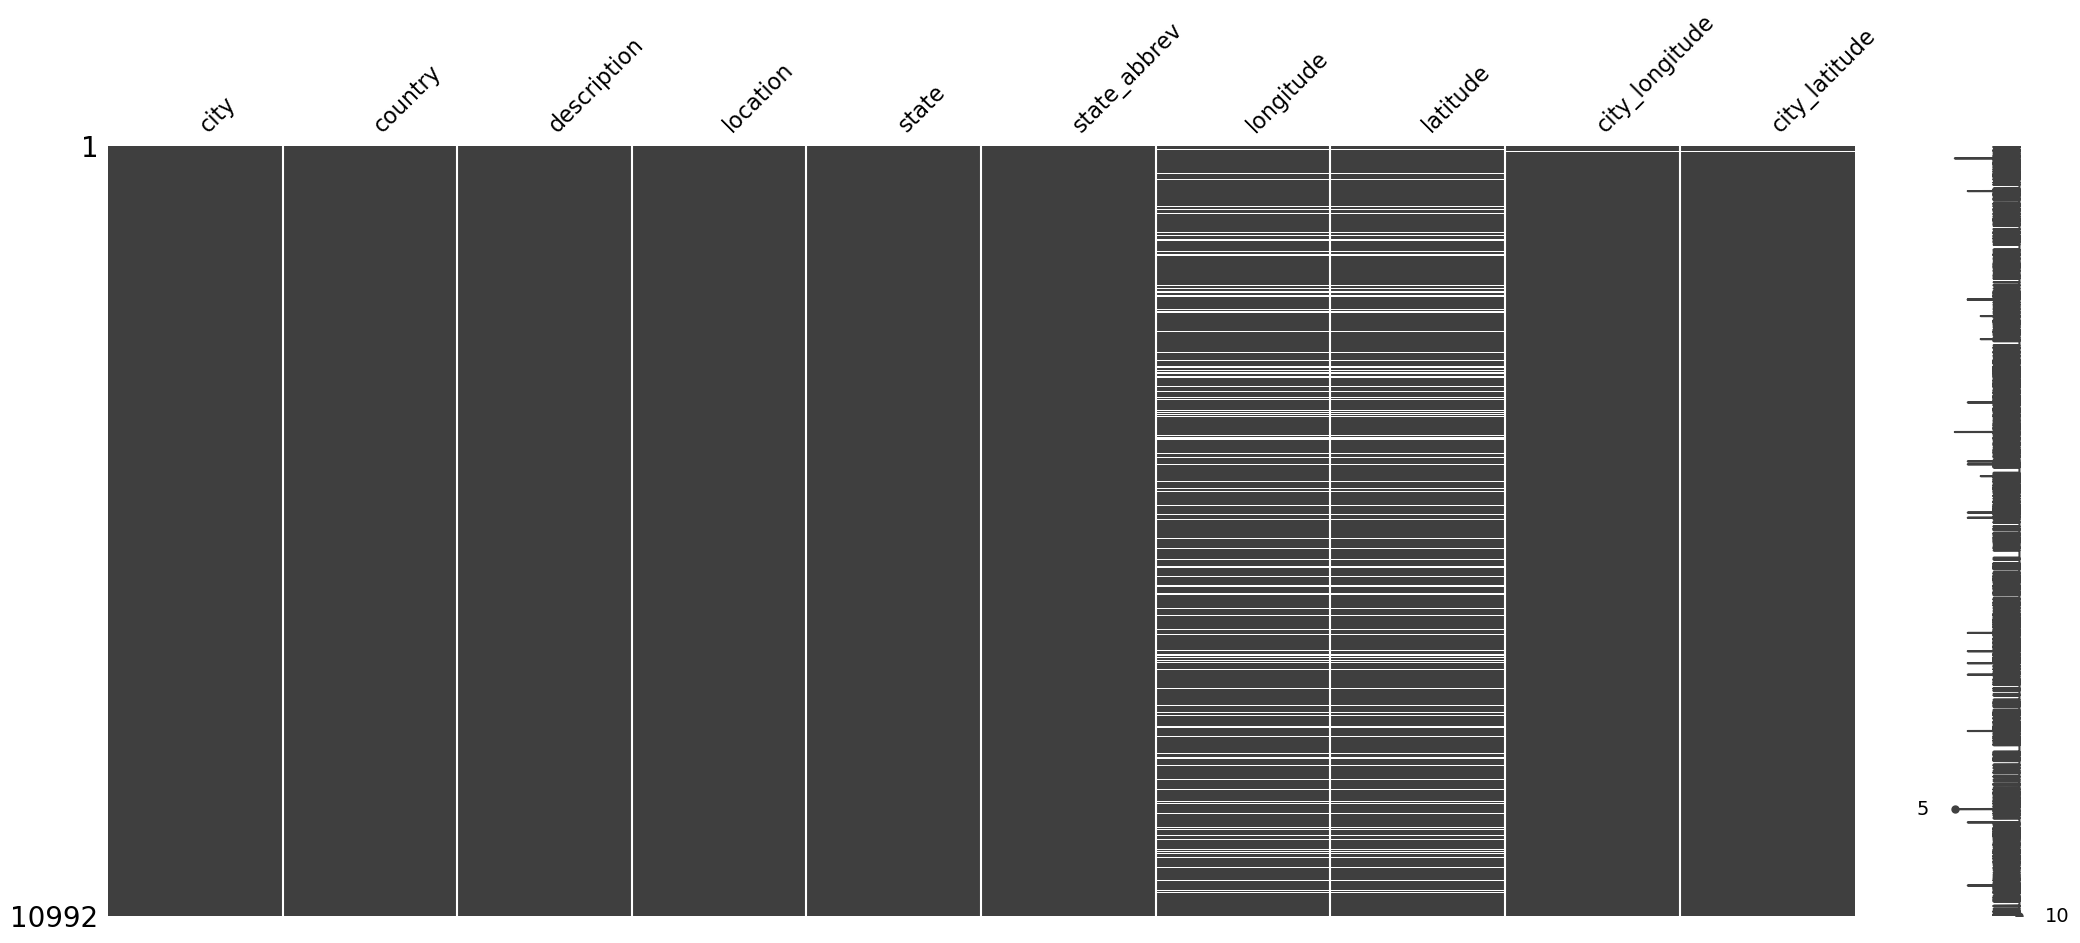

In [8]:
# Visualize missing values
import missingno as msno
msno.matrix(haunted_places)

**Analyzing missing values:**  
columns with missing values:
-  `city` and `location` are both missing 3 values each (or 0.027%).  
- `longitude` and `latitude` are both missing 1,261 values each (about 11%).  
- `city_longitude` and `city_latitude` are both missing 29 values each (about 0.264%).  

how we will handle these:
- Since `city` and `location` together make up less than 0.06% of data, we can go ahead and drop these.  
-  for `longitude` and `latitude`, we will check to see if there exists a corresponding `city_longitude` and `city_latitude` for each. If so, we will grab that value and fill with it. We can do the same but backwards for `city_longitude` and `city_latitude`. Whatever is left, we can drop.  

First we drop missing rows in `city` and `location`:

In [9]:
# Drop NA values from `city`
haunted_places.dropna(subset=['city'], inplace=True)

# Drop NA values from `location`
haunted_places.dropna(subset=['location'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city                 0
country              0
description          0
location             0
state                0
state_abbrev         0
longitude         1255
latitude          1255
city_longitude      26
city_latitude       26
dtype: int64

Now, let's try to fill as many `longitude` and `latitude` values as possible using lambda functions. 

In [10]:
# Iterate through `longitude` and check for missing values 
haunted_places['longitude'] = haunted_places.apply(
    # For each row in `city_longitude` which is filled, fill `longitude` with it, and leave alone otherwise
    lambda row: row['city_longitude'] if pd.isnull(row['longitude']) else row['longitude'],
    axis=1
)

# Iterate through `latitude` and check for missing values 
haunted_places['latitude'] = haunted_places.apply(
    # For each row in `city_latitude` which is filled, fill `latitude` with it, and leave alone otherwise
    lambda row: row['city_latitude'] if pd.isnull(row['latitude']) else row['latitude'],
    axis=1
)

# print the new count on missing values
longitude_remaining = haunted_places['longitude'].isnull().sum()
print("There are " + str(longitude_remaining) + " nulls left in `longitude`.")
latitude_remaining = haunted_places['latitude'].isnull().sum()
print("There are " + str(latitude_remaining) + " nulls left in `latitude`.")

There are 15 nulls left in `longitude`.
There are 15 nulls left in `latitude`.


do the same with `city_longitude` and `city_latitude`.  

In [11]:
# Iterate through `city_longitude` and check for missing values 
haunted_places['city_longitude'] = haunted_places.apply(
    # For each row in `longitude` which is filled, fill `city_longitude` with it, and leave alone otherwise
    lambda row: row['longitude'] if pd.isnull(row['city_longitude']) else row['city_longitude'],
    axis=1
)

# Iterate through `city_latitude` and check for missing values 
haunted_places['city_latitude'] = haunted_places.apply(
    # For each row in `latitude` which is filled, fill `city_latitude` with it, and leave alone otherwise
    lambda row: row['latitude'] if pd.isnull(row['city_latitude']) else row['city_latitude'],
    axis=1
)

# print the new count on missing values
city_longitude_remaining = haunted_places['city_longitude'].isnull().sum()
print("There are " + str(city_longitude_remaining) + " nulls left in `city_longitude`.")
city_latitude_remaining = haunted_places['city_latitude'].isnull().sum()
print("There are " + str(city_latitude_remaining) + " nulls left in `city_latitude`.")

There are 15 nulls left in `city_longitude`.
There are 15 nulls left in `city_latitude`.


Both `longitude` and `latitude`, as well as `city_longitude` and `city_latitude` have 15 values left. Let's check them to be sure they are all the same:  

In [12]:
haunted_places[haunted_places['longitude'].isnull()]

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
643,Darktown,United States,"Reports of trolls, Hellhounds, human forms, ac...","""THE ALAMO""",Pennsylvania,PA,NaN,NaN,NaN,NaN
2188,Saddle Community,United States,Old timers tell of a haunting on 9 Mile Ridge ...,9 Mile Ridge,Arkansas,AR,NaN,NaN,NaN,NaN
2196,Tazlina,United States,The Tazlina Lodge is not in use anymore. Long ...,Tazlina Lodge,Arkansas,AR,NaN,NaN,NaN,NaN
3660,Fort Defiance,United States,The school gym is haunted by several children ...,Tse Ho Tso Middle School,Alabama,AL,NaN,NaN,NaN,NaN
4501,Akra/Leroy,United States,it's to be said that a lady has been seen with...,Road between Akra and Leroy,North Dakota,ND,NaN,NaN,NaN,NaN
4543,Mandan outskirts,United States,The spirit of the wives of the soldiers who we...,Custer House boardwalk,North Dakota,ND,NaN,NaN,NaN,NaN
5232,Diphtheria Hill,United States,An old cemetery on a hill near Clay Center whe...,Clay Center,Kansas,KS,NaN,NaN,NaN,NaN
5306,Rural Niotaze,United States,El Cado Cemetery - Witnesses claim to have see...,The Sandhills,Kansas,KS,NaN,NaN,NaN,NaN
6950,Harpo Studios,United States,Was the sight of a makeshift morgue after the ...,formerly the Chicago armory,Illinois,IL,NaN,NaN,NaN,NaN
7211,Reedsville,United States,Well as it is told if you go to the bridge and...,Dick Huffman bridge,Indiana,IN,NaN,NaN,NaN,NaN


The dataframe shows that there are NaNs for all four columns in question, meaning that these remaining 15 values can now be dropped, now that we know there is no latitude/longitude available to fill in either direction.  

In [13]:
# Drop NA values from longitude
haunted_places.dropna(subset=['longitude'], inplace=True)

# Display updated missing values
haunted_places.isnull().sum()

city              0
country           0
description       0
location          0
state             0
state_abbrev      0
longitude         0
latitude          0
city_longitude    0
city_latitude     0
dtype: int64

now that missing values have been handled, we'll check for duplicates. 


In [14]:
# Check for duplicate rows
duplicate_rows = haunted_places.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = haunted_places.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = haunted_places[duplicate_mask_all]
duplicate_rows_all_df

There are 2 duplicate row(s).



,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
1445,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
1453,Chestnut Hill,United States,Students have reported lights along the pathwa...,Pine Manor College,Massachusetts,MA,-71.157477,42.319909,-71.166187,42.330380
6821,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273
6824,Fort Wayne,United States,It is believed that Carroll High School is cur...,Carroll High School,Indiana,IN,-85.192519,41.190347,-85.139351,41.079273


There are 2 duplicates to remove.  

In [15]:
# Remove duplicate rows, if any
if duplicate_rows > 0: 
    haunted_places.drop_duplicates(inplace=True)

# Verify that the removal worked
duplicate_rows = haunted_places.duplicated().sum()
print("There are now " + str(duplicate_rows) + " duplicate row(s).\n")

There are now 0 duplicate row(s).



now let's determine if any data types need conversion.


In [16]:
# Display data types for each column
haunted_places.dtypes

city               object
country            object
description        object
location           object
state              object
state_abbrev       object
longitude         float64
latitude          float64
city_longitude    float64
city_latitude     float64
dtype: object

All data types look good. Next, let's do a quick check for outliers using box plots for each numerical column:

# Exploratory Data Analysis

### 1. visualization
**Univariate**   
- countplot for the top `state_abbrev`   
- highlight top `state_abbrev` on map   
- countplot for the top `city`  
- map of `city`s with top n observations.  

**bivariate**  
- scatterplot map of `longitude` vs `latitude`   
- scatterplot map of  `city_longitude` vs `city_latitude` 
- for the top few of `city`, a countplot of the top `location`s

**multivariate**    
- plot top `city` by their `city_longitude` and `city_latitude`  
- plot top `city` by their `longitude` and `latitude`  
- plot top `location`s by their `longitude` and `latitude`, for each top `city`

### 2. natural language processing  
**text processing**: to identify the most frequent words in `description` and `location` for the top few of `city`
**named entity recognition**: to try to pick out names and locations in `description` and `location` for the top few of `city`
**Topic modeling using Latent Dirichlet Allocation (LDA) with Gensim**: to find patterns in the abstract topics within `description` and `location` for the top few of `city`


### 3. statistical analysis
**ANOVA**  
- After finding counts for top n states, cities, produce boxplots for each n to visualize the differences.  
- Determine if significant difference exists between the mean number of observations for each state and city. 

### 4. relationships between variables


### 1. initial visualizations
countplot for the top `state_abbrev`:  

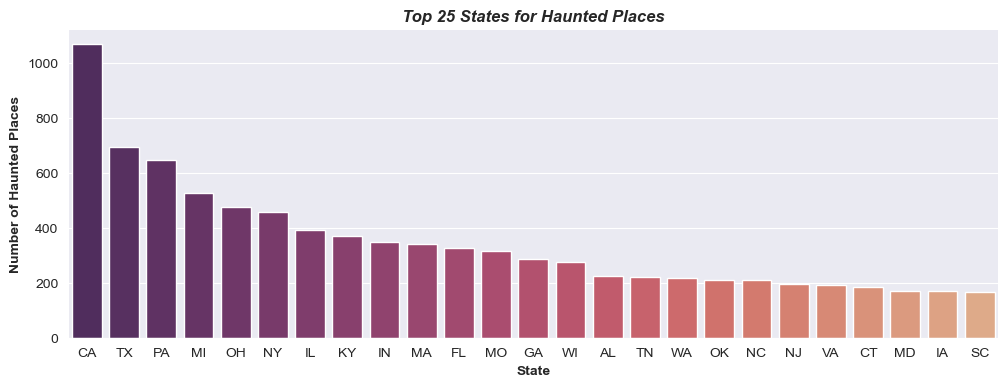

In [67]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Set up filter for states to be in descending order
states_order = haunted_places['state_abbrev'].value_counts().head(25).index

# establish the plot
sns.countplot(x="state_abbrev", data=haunted_places, palette="flare_r", order=states_order, ax=ax)
ax.set_title('Top 25 States for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('State', weight='bold')
ax.set_ylabel('Number of Haunted Places', weight='bold')

plt.show()


highlight top `state_abbrev` on map:  

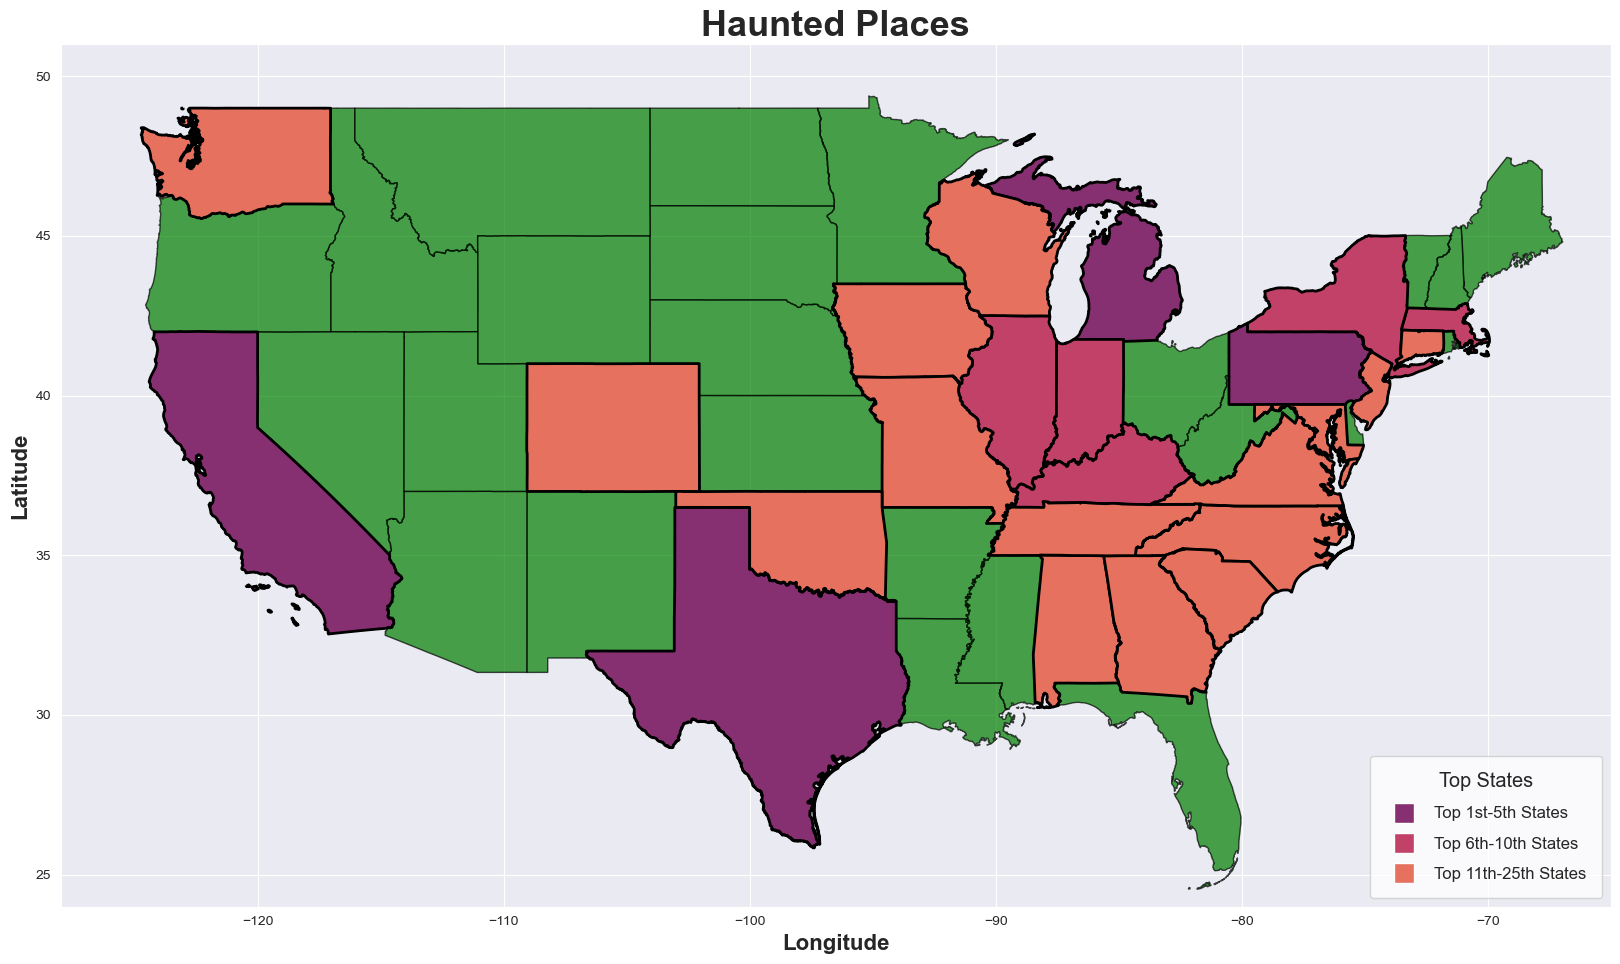

In [179]:
# Import necessary library for geographical data
import geopandas as gpd

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('../gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 14))


# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', facecolor='green', alpha=0.7)  
# set up a custom color palette using "flare" in reverse order so darker colors indicate higher frequencies
palette = sns.color_palette("flare", 3)
palette = palette[::-1]
# define colors for each "top n" category
first_color = palette[0]
second_color = palette[1]
third_color = palette[2]

# highlight the top 5 most haunted states
top_five = haunted_places['state'].value_counts().head(4).index
highlight_gdf_top_five = states_gdf[states_gdf['NAME'].isin(top_five)]
highlight_gdf_top_five.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=first_color)
# highlight for the top 6th-10th states
top_six_thru_ten = haunted_places['state'].value_counts().iloc[5:10].index
highlight_gdf_top_six_thru_ten = states_gdf[states_gdf['NAME'].isin(top_six_thru_ten)]
highlight_gdf_top_six_thru_ten.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=second_color)
# highlight for the top 11th-20th states
top_eleven_thru_twenty = haunted_places['state'].value_counts().iloc[11:26].index
highlight_gdf_top_eleven_thru_twenty = states_gdf[states_gdf['NAME'].isin(top_eleven_thru_twenty)]
highlight_gdf_top_eleven_thru_twenty.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=third_color)


# overall plot title
ax.set_title('Haunted Places', fontsize=26, weight='bold')

# name labels
ax.set_xlabel('Longitude', weight='bold', fontsize=16)
ax.set_ylabel('Latitude', weight='bold', fontsize=16)

# add a custom legend
legend_labels=['Top 1st-5th States', 'Top 6th-10th States', 'Top 11th-25th States']
legend_colors=[first_color, second_color, third_color]
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=14, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Top States', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', loc='lower right')


# change axis limits so the US is centered
ax.set_ylim(24, 51)
ax.set_xlim(-128, -65)

# show the plot
plt.show()

countplot for the top of `city`:  
*> Note: Columbus is captured more than once, we'll need to sort that out.*  

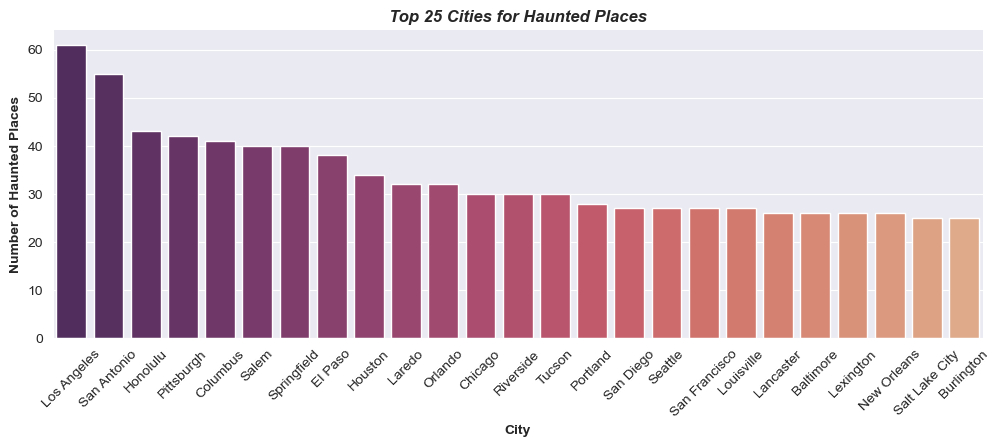

In [205]:
# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Set up filter for cities to be in descending order
top_cities = haunted_places['city'].value_counts().head(25).index

# establish the plot
sns.countplot(x="city", data=haunted_places, palette="flare_r", order=top_cities, ax=ax)
ax.set_title('Top 25 Cities for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Number of Haunted Places', weight='bold')

# Rotate the labels so they are more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# show the plot
plt.show()

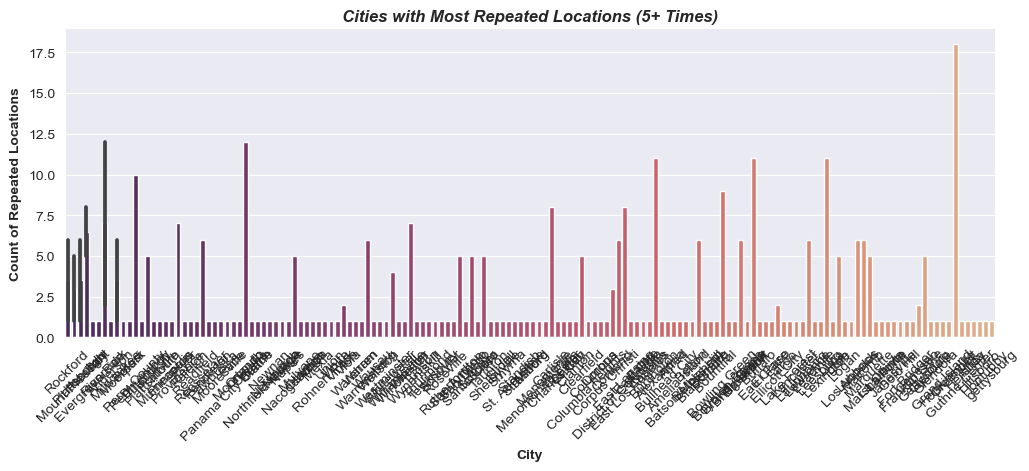

In [298]:
# Filter 'locations' that appear 5 or more times
filtered_locations = haunted_places['location'].value_counts()[haunted_places['location'].value_counts() >= 5].index

# Filter the data to include only the selected 'locations'
filtered_data = haunted_places[haunted_places['location'].isin(filtered_locations)]

# Count the number of occurrences of each 'location' in each city
city_location_counts = filtered_data.groupby(['city', 'location']).size().reset_index(name='count')

# Find the city with the most 'location's
top_cities = city_location_counts['city'].value_counts(25).index

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Create the count plot
sns.barplot(x="city", y="count", data=city_location_counts, palette="flare_r", order=top_cities, ax=ax)
ax.set_title('Cities with Most Repeated Locations (5+ Times)', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Count of Repeated Locations', weight='bold')

# Rotate the labels so they are more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


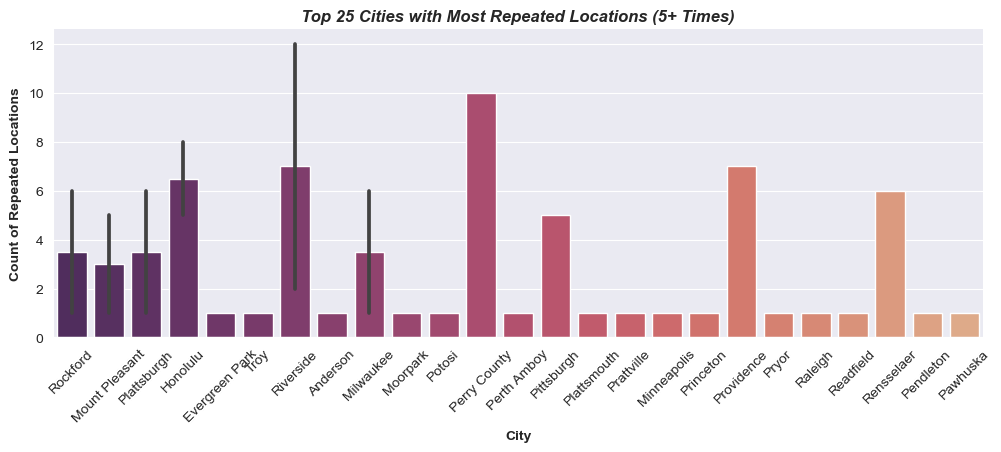

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'haunted_places' is your DataFrame

# Filter 'locations' that appear 5 or more times
filtered_locations = haunted_places['location'].value_counts()[haunted_places['location'].value_counts() >= 5].index

# Filter the data to include only the selected 'locations'
filtered_data = haunted_places[haunted_places['location'].isin(filtered_locations)]

# Count the number of occurrences of each 'location' in each city
city_location_counts = filtered_data.groupby(['city', 'location']).size().reset_index(name='count')

# Find the top 25 cities with the most 'location's
top_cities = city_location_counts['city'].value_counts().head(25).index

# Filter the data to include only the top 25 cities
city_location_counts_top25 = city_location_counts[city_location_counts['city'].isin(top_cities)]

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Create the count plot
sns.barplot(x="city", y="count", data=city_location_counts_top25, palette="flare_r", order=top_cities, ax=ax)
ax.set_title('Top 25 Cities with Most Repeated Locations (5+ Times)', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Count of Repeated Locations', weight='bold')

# Rotate the labels so they are more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


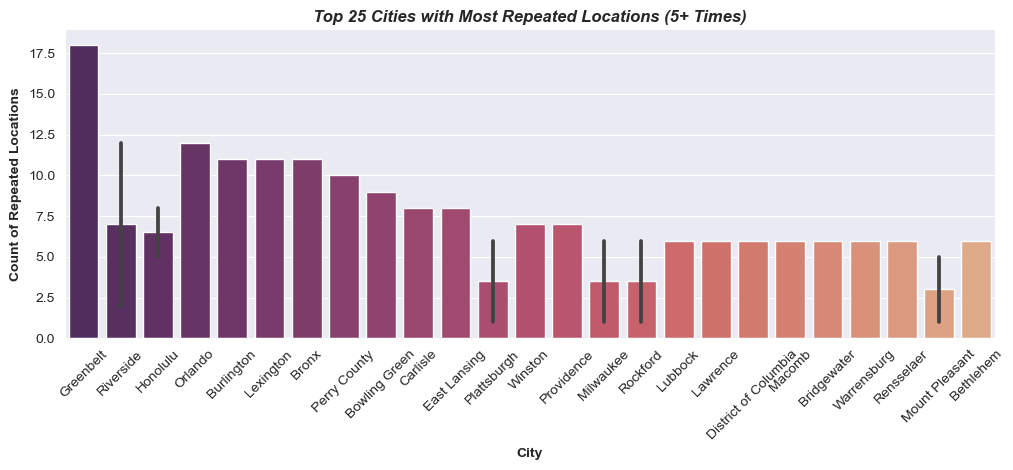

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'haunted_places' is your DataFrame

# Filter 'locations' that appear 5 or more times
filtered_locations = haunted_places['location'].value_counts()[haunted_places['location'].value_counts() >= 5].index

# Filter the data to include only the selected 'locations'
filtered_data = haunted_places[haunted_places['location'].isin(filtered_locations)]

# Count the number of occurrences of each 'location' in each city
city_location_counts = filtered_data.groupby(['city', 'location']).size().reset_index(name='count')

# Find the top 25 cities with the most 'location's
top_cities = city_location_counts.groupby('city')['count'].sum().reset_index()
top_cities = top_cities.sort_values(by='count', ascending=False).head(25)['city'].tolist()

# Filter the data to include only the top 25 cities
city_location_counts_top25 = city_location_counts[city_location_counts['city'].isin(top_cities)]

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Create the count plot
sns.barplot(x="city", y="count", data=city_location_counts_top25, palette="flare_r", order=top_cities, ax=ax)
ax.set_title('Top 25 Cities with Most Repeated Locations (5+ Times)', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Count of Repeated Locations', weight='bold')

# Rotate the labels so they are more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


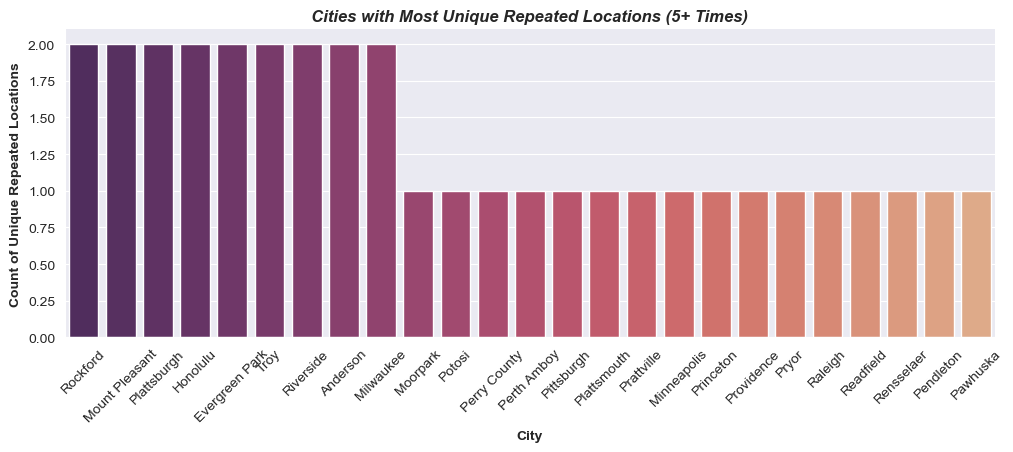

In [303]:
# Filter 'locations' that appear 5 or more times
filtered_locations = haunted_places['location'].value_counts()[haunted_places['location'].value_counts() >= 5].index

# Filter the data to include only the selected 'locations'
filtered_data = haunted_places[haunted_places['location'].isin(filtered_locations)]

# Count the number of unique 'locations' with 5 or more appearances in each city
city_location_counts = filtered_data.groupby('city')['location'].nunique().reset_index(name='count')

# Find the top 25 cities with the most unique 'locations'
top_cities = city_location_counts.sort_values(by='count', ascending=False).head(25)['city']

# Filter the data to include only the top 25 cities
city_location_counts_top25 = city_location_counts[city_location_counts['city'].isin(top_cities)]

# Set up plot and styles
f, ax = plt.subplots(figsize=(12, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Create the count plot
sns.barplot(x="city", y="count", data=city_location_counts_top25, palette="flare_r", order=top_cities, ax=ax)
ax.set_title('Cities with Most Unique Repeated Locations (5+ Times)', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Count of Unique Repeated Locations', weight='bold')

# Rotate the labels so they are more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


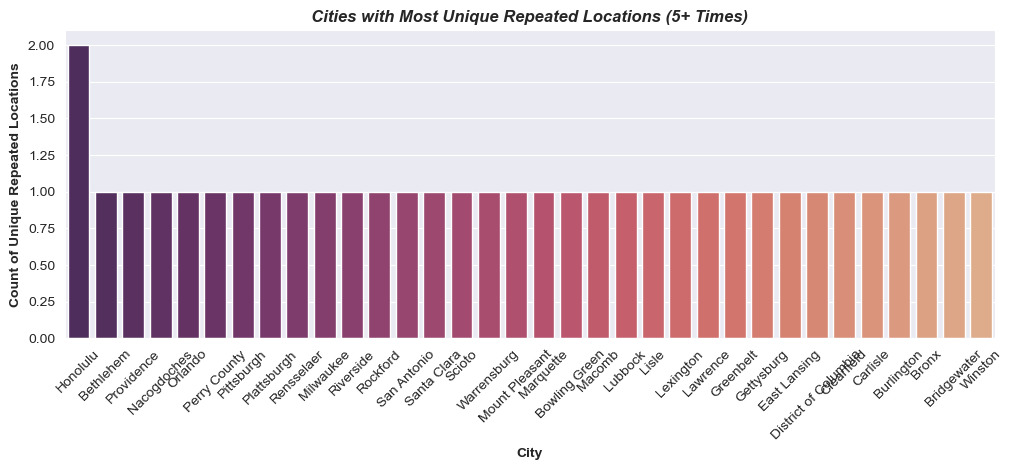

In [307]:

# Filter 'locations' that appear 5 or more times
locations_with_5_or_more = haunted_places.groupby('location').filter(lambda x: len(x) >= 3)

# Group by 'city' and 'location' and count occurrences
city_location_counts = locations_with_5_or_more.groupby(['city', 'location']).size().reset_index(name='count')

# Filter locations in each city with 5+ occurrences
city_location_counts_5_or_more = city_location_counts[city_location_counts['count'] >= 5]

# Group by 'city' and count the number of unique 'locations' with 5+ occurrences
city_counts = city_location_counts_5_or_more.groupby('city').size().reset_index(name='count')

# Sort cities based on count
sorted_cities = city_counts.sort_values(by='count', ascending=False)

# Visualization
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x="city", y="count", data=sorted_cities, palette="flare_r", ax=ax)
ax.set_title('Cities with Most Unique Repeated Locations (5+ Times)', fontsize=12, weight='bold', style='italic', y=1)
ax.set_xlabel('City', weight='bold')
ax.set_ylabel('Count of Unique Repeated Locations', weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


scatterplot map of `longitude` vs `latitude`

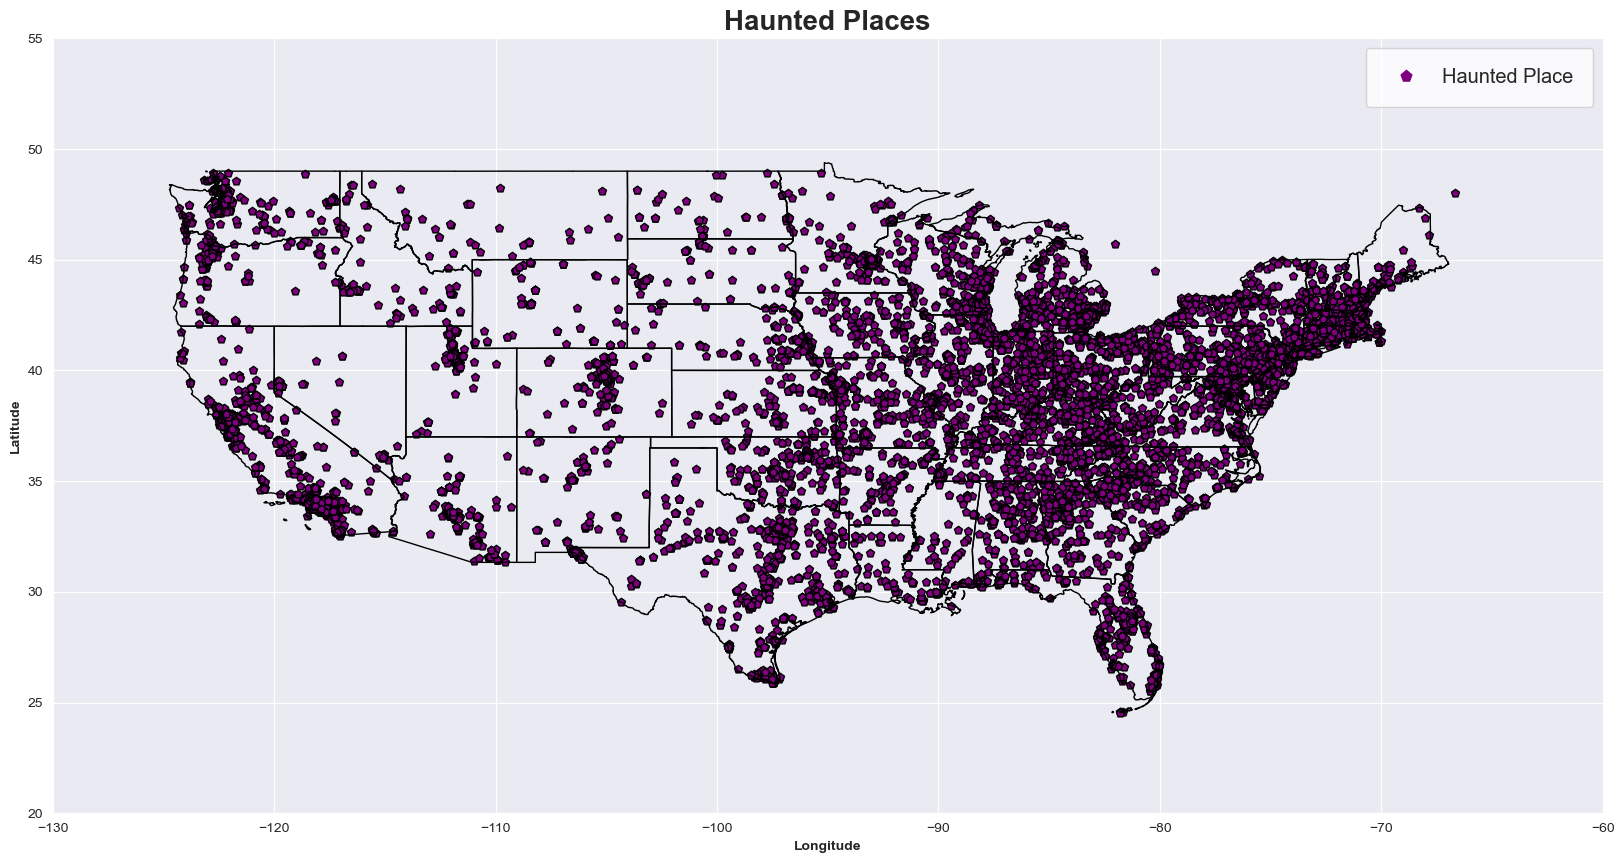

In [154]:
# Import necessary library for geographical data
from shapely.geometry import Point

# set up the geometries for the geodataframes
geometry = [Point(xy) for xy in zip(haunted_places['longitude'], haunted_places['latitude'])]

# create the geodataframes
haunted_places_gdf = gpd.GeoDataFrame(haunted_places, geometry=geometry)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('../gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 15))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# plot the geodataframes
haunted_places_gdf.plot(ax=ax, color='purple', marker='p', edgecolor='black')

# overall plot title
ax.set_title('Haunted Places', fontsize=20, weight='bold')

# add a custom legend
legend_labels=['Haunted Place']
legend_colors=['purple']
legend_handles = [plt.Line2D([0], [0], marker='p', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')

# change axis limits so the US is centeredd
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)

# show the plot
plt.show()

scatterplot map of  `city_longitude` vs `city_latitude`

for the top few of `city`, a countplot of the top `location`s
1. Los Angeles  
2. San Antonio  
3. Honolulu  

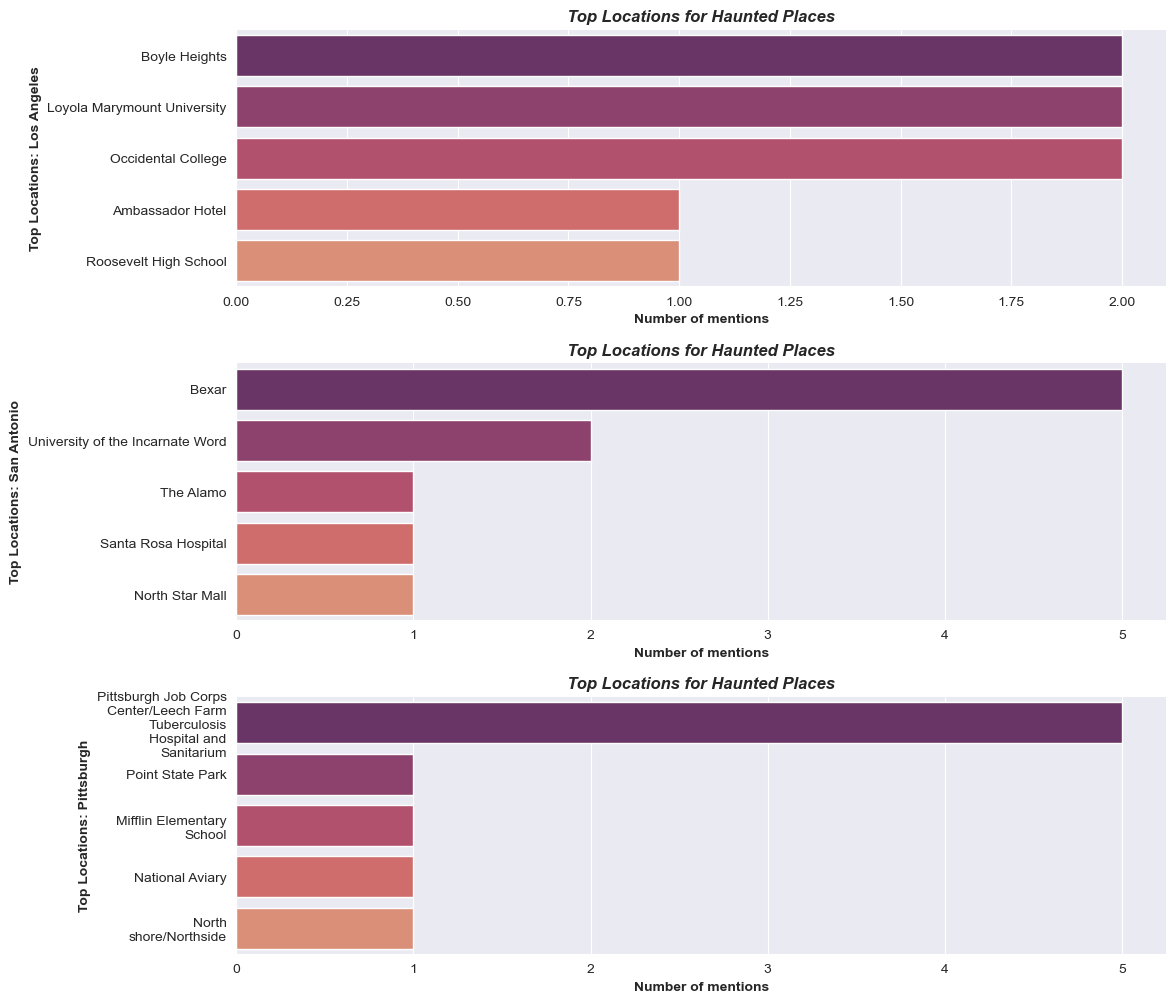

In [280]:
import textwrap

# Filter `haunted_places` based on top cities
top_cities_df = haunted_places.query("city == 'Los Angeles'")
los_angeles_df = haunted_places.query("city == 'Los Angeles'")
san_antonio_df = haunted_places.query("city == 'San Antonio'")
pittsburgh_df = haunted_places.query("city == 'Pittsburgh'")

# Set up plot and styles
f, ax = plt.subplots(3, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Set up filter for each df for locations, making them in descending order
top_locations_los_angeles = los_angeles_df['location'].value_counts().head(5).index
top_locations_san_antonio = san_antonio_df['location'].value_counts().head(5).index
top_locations_pittsburgh = pittsburgh_df['location'].value_counts().head(5).index

# establish the plots
sns.countplot(y="location", data=los_angeles_df, palette="flare_r", order=top_locations_los_angeles, ax=ax[0])
ax[0].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[0].set_xlabel('Number of mentions', weight='bold')
ax[0].set_ylabel('Top Locations: Los Angeles', weight='bold')

sns.countplot(y="location", data=san_antonio_df, palette="flare_r", order=top_locations_san_antonio, ax=ax[1])
ax[1].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[1].set_xlabel('Number of mentions', weight='bold')
ax[1].set_ylabel('Top Locations: San Antonio', weight='bold')

sns.countplot(y="location", data=pittsburgh_df, palette="flare_r", order=top_locations_pittsburgh, ax=ax[2])
ax[2].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[2].set_xlabel('Number of mentions', weight='bold')
ax[2].set_ylabel('Top Locations: Pittsburgh', weight='bold')

# Wrap the y-tick labels
labels = [textwrap.fill(label.get_text(), 20) for label in ax[2].get_yticklabels()]
ax[2].set_yticklabels(labels)

# show the plot
plt.show()

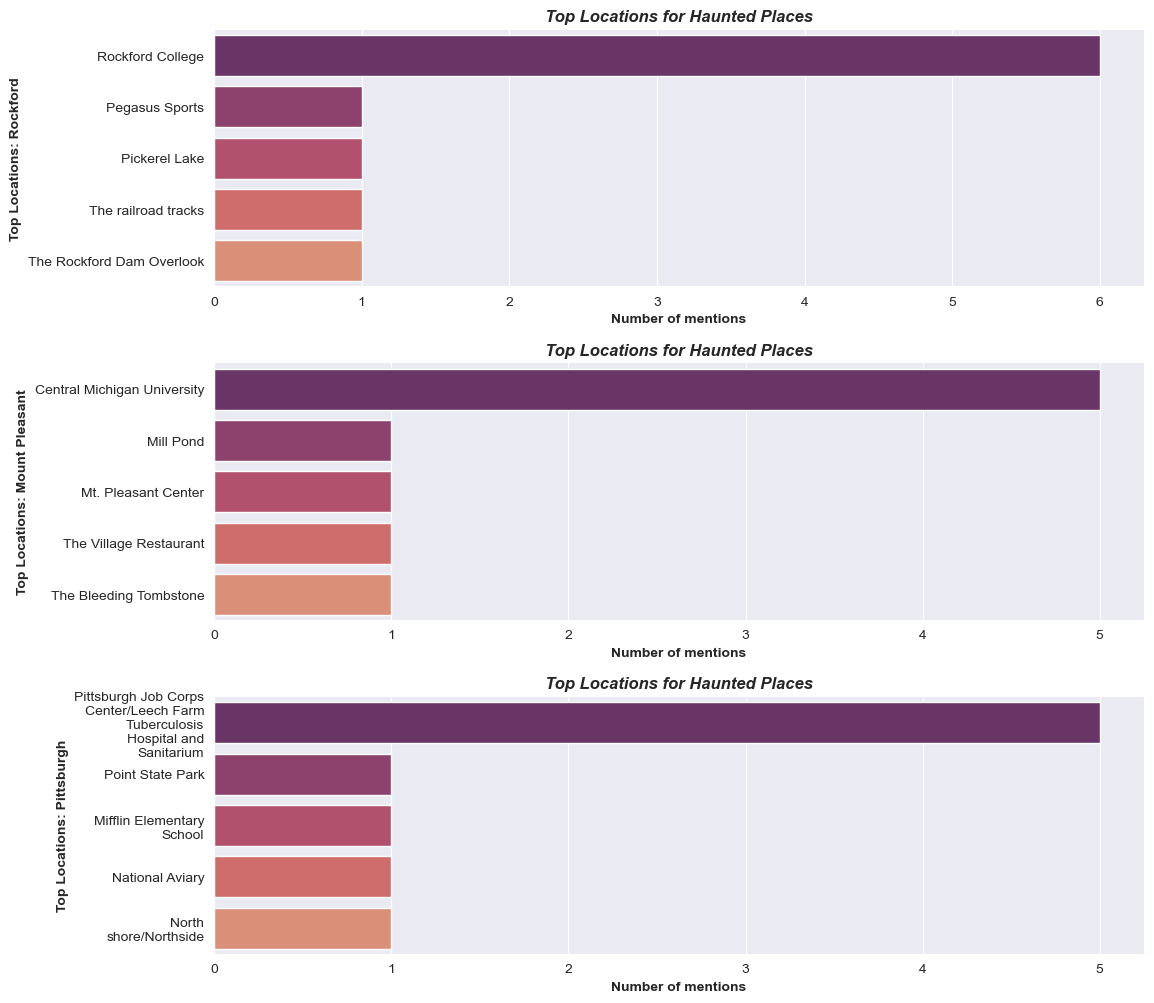

In [305]:
# Filter `haunted_places` based on top cities
top_cities_df = haunted_places.query("city == 'Los Angeles'")
rockford_df = haunted_places.query("city == 'Rockford'")
mount_pleasant_df = haunted_places.query("city == 'Mount Pleasant'")
pittsburgh_df = haunted_places.query("city == 'Pittsburgh'")

# Set up plot and styles
f, ax = plt.subplots(3, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# Set up filter for each df for locations, making them in descending order
top_locations_rockford = rockford_df['location'].value_counts().head(5).index
top_locations_mount_pleasant = mount_pleasant_df['location'].value_counts().head(5).index
top_locations_pittsburgh = pittsburgh_df['location'].value_counts().head(5).index

# establish the plots
sns.countplot(y="location", data=rockford_df, palette="flare_r", order=top_locations_rockford, ax=ax[0])
ax[0].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[0].set_xlabel('Number of mentions', weight='bold')
ax[0].set_ylabel('Top Locations: Rockford', weight='bold')

sns.countplot(y="location", data=mount_pleasant_df, palette="flare_r", order=top_locations_mount_pleasant, ax=ax[1])
ax[1].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[1].set_xlabel('Number of mentions', weight='bold')
ax[1].set_ylabel('Top Locations: Mount Pleasant', weight='bold')

sns.countplot(y="location", data=pittsburgh_df, palette="flare_r", order=top_locations_pittsburgh, ax=ax[2])
ax[2].set_title('Top Locations for Haunted Places', fontsize=12, weight='bold', style='italic', y=1)
ax[2].set_xlabel('Number of mentions', weight='bold')
ax[2].set_ylabel('Top Locations: Pittsburgh', weight='bold')

# Wrap the y-tick labels
labels = [textwrap.fill(label.get_text(), 20) for label in ax[2].get_yticklabels()]
ax[2].set_yticklabels(labels)

# show the plot
plt.show()

plot top `city` by their `city_longitude` and `city_latitude`:  
*> Note: Honolulu was excluded but is in the top 10. If we want to keep it, we need to find a map that shows HI closer into the frame.*  
*> Note: as noted above, Columbus needs to be sorted out.*  

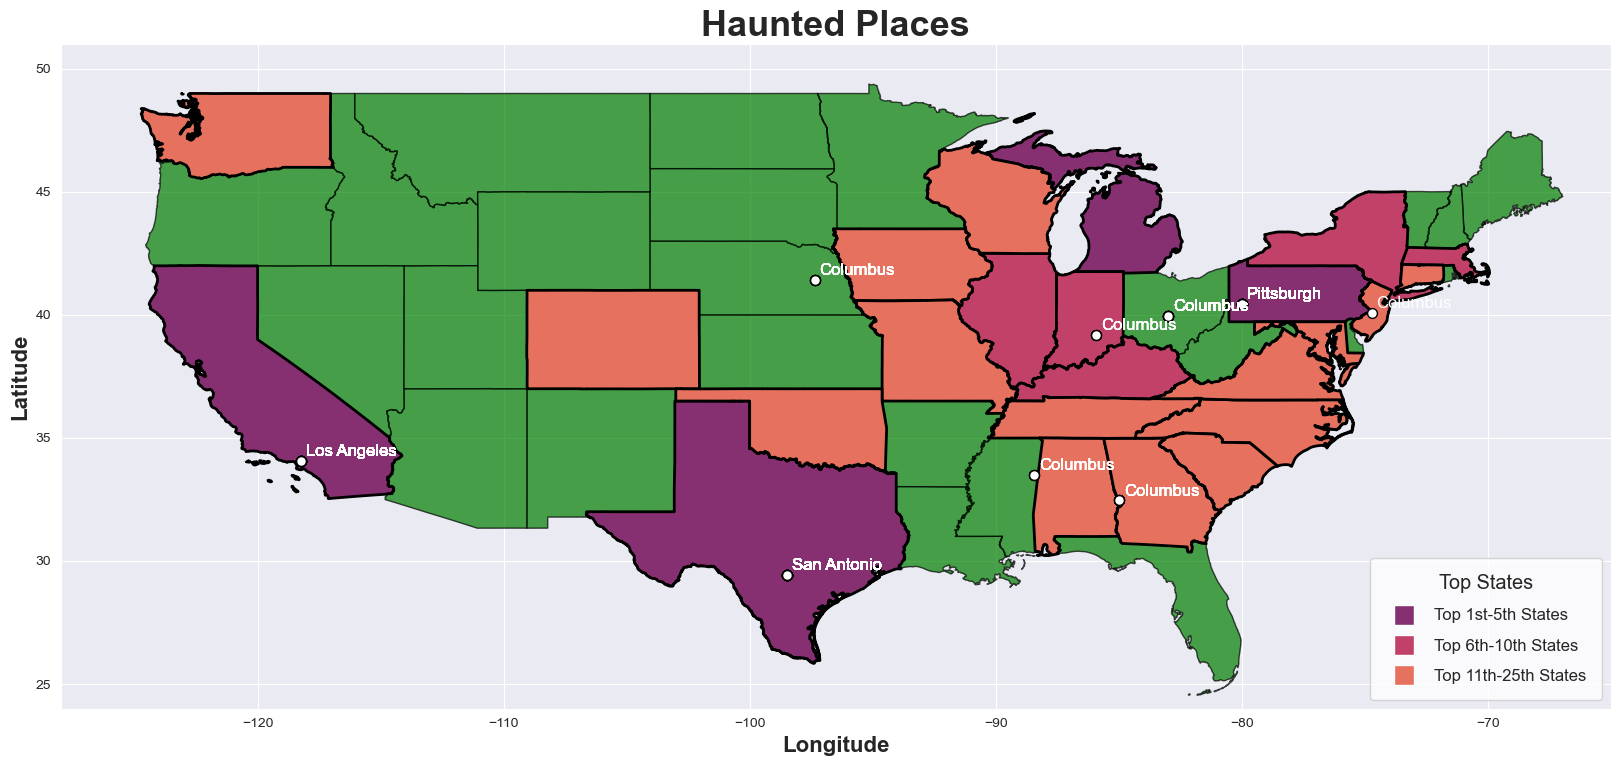

In [176]:
# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('../gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 14))


# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black', facecolor='green', alpha=0.7)  
# set up a custom color palette using "flare" in reverse order so darker colors indicate higher frequencies
palette = sns.color_palette("flare", 3)
palette = palette[::-1]
# define colors for each "top n" category
first_color = palette[0]
second_color = palette[1]
third_color = palette[2]
# highlight the top 5 most haunted states
top_five = haunted_places['state'].value_counts().head(4).index
highlight_gdf_top_five = states_gdf[states_gdf['NAME'].isin(top_five)]
highlight_gdf_top_five.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=first_color)
# highlight for the top 6th-10th states
top_six_thru_ten = haunted_places['state'].value_counts().iloc[5:10].index
highlight_gdf_top_six_thru_ten = states_gdf[states_gdf['NAME'].isin(top_six_thru_ten)]
highlight_gdf_top_six_thru_ten.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=second_color)
# highlight for the top 11th-20th states
top_eleven_thru_twenty = haunted_places['state'].value_counts().iloc[11:26].index
highlight_gdf_top_eleven_thru_twenty = states_gdf[states_gdf['NAME'].isin(top_eleven_thru_twenty)]
highlight_gdf_top_eleven_thru_twenty.boundary.plot(ax=ax, linewidth=2, color='black', facecolor=third_color)


# Compile the top cities and their longitudes and latitudes (excluding Honolulu)
top_cities = haunted_places['city'].value_counts().head(5).index
top_cities_df = haunted_places[haunted_places['city'].isin(top_cities) & (haunted_places['city'] != 'Honolulu')]
geometry_cities = [Point(xy) for xy in zip(top_cities_df['city_longitude'], top_cities_df['city_latitude'])]
top_cities_gdf = gpd.GeoDataFrame(top_cities_df, geometry=geometry_cities)
# plot the top cities
top_cities_gdf.plot(ax=ax, color='white', edgecolor='black', markersize=50, zorder=11)
# adds labels for cities
for x, y, label in zip(top_cities_df['city_longitude'], top_cities_df['city_latitude'], top_cities_df['city']):
    ax.text((x+0.2), (y+0.2), label, fontsize=12, color='white', zorder=12)


# overall plot title
ax.set_title('Haunted Places', fontsize=26, weight='bold')
# name labels
ax.set_xlabel('Longitude', weight='bold', fontsize=16)
ax.set_ylabel('Latitude', weight='bold', fontsize=16)
# add a custom legend
legend_labels=['Top 1st-5th States', 'Top 6th-10th States', 'Top 11th-25th States']
legend_colors=[first_color, second_color, third_color]
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=14, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Top States', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white', loc='lower right')
# change axis limits so the US is centered
ax.set_ylim(24, 51)
ax.set_xlim(-128, -65)
# show the plot
plt.show()

plot top `city` by their `longitude` and `latitude`

plot top `location`s by their `longitude` and `latitude`, for each top `city`
1. Los Angeles

In [329]:
import folium

# Group by 'location' to get count of mentions for each location
location_counts_los_angeles = los_angeles_df['location'].value_counts().reset_index()
location_counts_los_angeles.columns = ['location', 'count']

# Merge the original DataFrame with the counts
los_angeles_df = los_angeles_df.merge(location_counts_los_angeles, on='location', how='left')

# Filter the DataFrame to include only the top 5 locations
in_top_five_los_angeles = los_angeles_df[los_angeles_df['location'].isin(top_locations_los_angeles)]

# Filter the DataFrame to exclude the top 5 locations
not_in_top_five_los_angeles = los_angeles_df[~los_angeles_df['location'].isin(top_locations_los_angeles)]


# Create a base map centered around Los Angeles
m_los_angeles = folium.Map(
                    location=[34.05, -118.25],
                    zoom_start=10,
                    control_scale=True
                )

# Add blue points to map for `location`s in top 5
for index, row in in_top_five_los_angeles.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_los_angeles)

# Add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_los_angeles.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    popup = folium.Popup(html=tooltip_text, max_width=300)
    folium.Marker([row['latitude'], row['longitude']],
                  popup=popup,
                  icon=folium.Icon(color="green")).add_to(m_los_angeles)

# Display the map
m_los_angeles

2. San Antonio

In [322]:
# Group by 'location' to get count of mentions for each location
location_counts = san_antonio_df['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Merge the original DataFrame with the counts
san_antonio_df = san_antonio_df.merge(location_counts, on='location', how='left')

# Filter the DataFrame to include only the top 5 locations
in_top_five_san_antonio = san_antonio_df[san_antonio_df['location'].isin(top_locations_san_antonio)]

# Filter the DataFrame to exclude the top 5 locations
not_in_top_five_san_antonio = san_antonio_df[~san_antonio_df['location'].isin(top_locations_san_antonio)]

# Create a base map centered around San Antonio
m_san_antonio = folium.Map(
                    location=[29.42, -98.49],
                    zoom_start=10
                    control_scale=True
                )

# Add blue points to map for `location`s in top 5
for index, row in in_top_five_san_antonio.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_san_antonio)

# Add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_san_antonio.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']],
                  tooltip=tooltip_text,
                  icon=folium.Icon(color="green")).add_to(m_san_antonio)

# Display the map
m_san_antonio

3. Pittsburgh

In [324]:
# Group by 'location' to get count of mentions for each location
location_counts_pittsburgh = pittsburgh_df['location'].value_counts().reset_index()
location_counts_pittsburgh.columns = ['location', 'count']

# Merge the original DataFrame with the counts
pittsburgh_df = pittsburgh_df.merge(location_counts_pittsburgh, on='location', how='left')

# Filter the DataFrame to include only the top 5 locations
in_top_five_pittsburgh = pittsburgh_df[pittsburgh_df['location'].isin(top_locations_pittsburgh)]

# Filter the DataFrame to exclude the top 5 locations
not_in_top_five_pittsburgh = pittsburgh_df[~pittsburgh_df['location'].isin(top_locations_pittsburgh)]

# Create a base map centered around Pittsburgh
m_pittsburgh = folium.Map(
                    location=[40.4406, -79.9959],
                    zoom_start=10,
                    control_scale=True
                    )


# Add blue points to map for `location`s in top 5
for index, row in in_top_five_pittsburgh.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']], tooltip=tooltip_text).add_to(m_pittsburgh)

# Add green points to map for `location`s NOT in top 5
for index, row in not_in_top_five_pittsburgh.iterrows():
    tooltip_text = f"{row['location']} (Mentions: {row['count']})\nDescription: {row['description']}"
    folium.Marker([row['latitude'], row['longitude']],
                  tooltip=tooltip_text,
                  icon=folium.Icon(color="green")).add_to(m_pittsburgh)

# Display the map
m_pittsburgh

### 2. natural language processing  
**text processing**: to identify the most frequent words in `description` and `location` for the top few of `city`
1. Los Angeles  

In [185]:
# the Natural Language Toolkit (nltk) for NLP 
# download `stopwords` once, and it will be stored locally
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mollyscally/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [188]:
# also in the nltk, download `punkt` tokenizer model once
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mollyscally/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [194]:
# Import necessary libraries 
from collections import Counter             # used for counting the frequency of words
from nltk.corpus import stopwords           # provides list of common stopwords to ignore
from nltk.tokenize import word_tokenize     # for tokenization

# create a dataframe for the first top location in Los Angeles
boyle_heights_df = los_angeles_df.query("location == 'Boyle Heights'")

# Initialize a counter object to keep track of word frequencies
word_count = Counter()

# Define stopwords like 'and', 'the', 'is', etc.
stop_words = set(stopwords.words('english'))
stop_words.update(['also', 'seen', 'reported'])     # Add custom stopwords

# Iterate thru `description`
for description in boyle_heights_df['description']:
    # text preprocessing
    description = description.lower()                   # converts text to lowercase
    words = word_tokenize(description)                  # tokenizes by individual word
    words = [w for w in words if w.isalnum()]           # filters out tokens that are not alphanumeric (e.g. punctuation)
    words = [w for w in words if w not in stop_words]   # removes stopwords from the list of words
    word_count.update(words)                            # updates the word frequency count using the list of processed words


# display the most common words
common_words_boyle_heights = word_count.most_common(10)
print("mosst common words: ", common_words_boyle_heights)


mosst common words:  [('floor', 35), ('school', 31), ('one', 29), ('building', 25), ('room', 24), ('night', 17), ('students', 16), ('man', 16), ('lights', 15), ('strange', 14)]


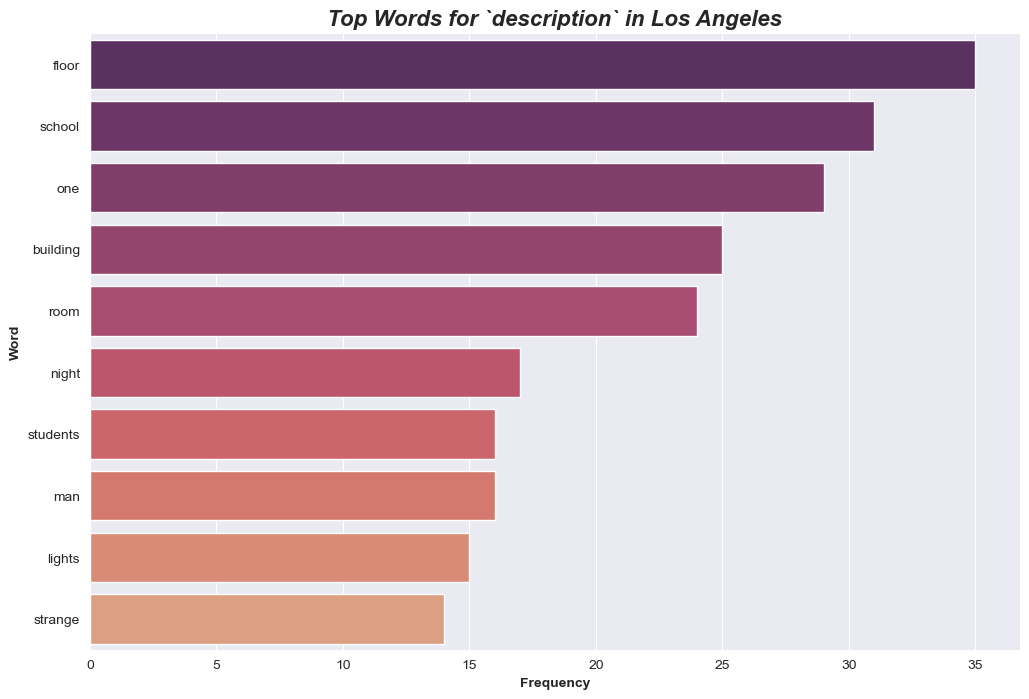

In [213]:
# create a visualization of the top words for `description` for Los Angeles

# create a dataframe from `common_words` (it is currently a list of tuples)
common_words_boyle_heights_df = pd.DataFrame(common_words_boyle_heights, columns=['Word', 'Frequency'])

# set up plot and styles
f, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.set_style('darkgrid')
sns.despine()

# now the bar chart
sns.barplot(x="Frequency", y="Word", data=common_words_boyle_heights_df, palette="flare_r")
ax.set_title('Top Words for `description` in Los Angeles', fontsize=16, weight='bold', style='italic', y=1)
ax.set_xlabel('Frequency', weight='bold')
ax.set_ylabel('Word', weight='bold')

# show the plot
plt.show()

Named Entity Recognition for `description`  
*> this technique will iterate thru descriptions for the top cities and pick out regocnizable things like names, locations, organizations.* 

In [196]:
# import necessary library
import spacy      # for advanced NLP

# load spaCy English language model
nlp = spacy.load("en_core_web_sm") 

# Initialize a counter to keep track of entity type frequency across descriptions
entity_type = Counter()

# Initialize a counter to keep track of entity name frequency across descriptions
entity_name = Counter()

# loop thru `description`
for description in top_cities_df['description']:
    doc = nlp(description) # processes text using spaCy pipeline and stores in `doc`

    # loop thru entities that spaCy regognized
    for ent in doc.ents:
        entity_type[ent.label_] += 1   # for each entity, increment count of it's type (`ent.label_`) in the `entity_count` counter
        entity_name[ent.text] += 1     # increment for specific named entites

# display most common entity types
print("Most common entities: ", entity_type.most_common())

# display most common entities
print("Most common entities: ", entity_name.most_common())

Most common entities:  [('DATE', 46), ('CARDINAL', 41), ('ORDINAL', 32), ('ORG', 29), ('PERSON', 24), ('TIME', 22), ('GPE', 16), ('FAC', 9), ('WORK_OF_ART', 3), ('NORP', 2), ('EVENT', 1), ('PRODUCT', 1), ('LOC', 1), ('MONEY', 1), ('QUANTITY', 1)]
Most common entities:  [('one', 11), ('Chaplin', 8), ('3rd', 6), ('night', 5), ('two', 5), ('third', 4), ('3', 4), ('One', 4), ('4th', 4), ('fourth', 3), ('late at night', 3), ('2nd', 3), ('three', 2), ('AMC', 2), ('Dodger Stadium', 2), ('the White Lady', 2), ('110', 2), ('Today', 2), ('the next day', 2), ('1929', 2), ('Los Angeles', 2), ('first', 2), ('Westminster Ave', 2), ('the day', 2), ('26', 2), ('Last year', 1), ('VH-1', 1), ('Random Play', 1), ('a hundred', 1), ('Late at night', 1), ('Suva Intermediate School - A', 1), ('2', 1), ('Arabella', 1), ('Belmont', 1), ('Belmont School for Girls', 1), ('1900s', 1), ('WWII', 1), ('Roosevelt High School - R Building', 1), ('a couple decades ago', 1), ('four', 1), ('Roosevelt', 1), ('Nun', 1), ('

Topic modeling of `description` using Latent Dirichlet Allocation (LDA) with Gensim  
*> explore the abstract topics that occur in descriptions.*   
*> the output of this LDA model will show the topics discovered and the words most strongly associated with each topic. The weight, which can be interpreted as the importance of each word is also shown.*

In [198]:
# import  necessary libraries
from gensim.corpora import Dictionary      # used for creating a dictionary of words and their occurences
from gensim.models import LdaModel         # the model for performing LDA

# text preprocessing
stop_words = set(stopwords.words('english'))    # the set of common words to ignore
texts = []                                      # initializes empty list to store tokenized/filtered text

# loop thru `description`
for description in top_cities_df['description']:
    tokens = word_tokenize(description.lower())     # tokenizes the description into words and converts to lower case
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]    # filters out non-alphanumeric and stopwords
    texts.append(filtered_tokens)                   # adds the filtered tokens to the `texts` list

# create Gensim dictionary and corpus
dictionary = Dictionary(texts)      # creates a dictionary where each unique word in `texts` is assigned a unique integer ID
corpus = [dictionary.doc2bow(text) for text in texts]   # converts the list of words in `text` to a bag-of-words format i.e., a list of `(word_id, word_count)` tuples

# train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)   # `num_topics=5` specifies 5 topics; `id2word=dictionary` maps word IDs back to words; `passes=15` number of passes thru the corpus during training

# display topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Topic {topic[0]}: Words: {topic[1]}')


Topic 0: Words: 0.015*"building" + 0.013*"one" + 0.011*"auditorium" + 0.010*"students" + 0.008*"high"
Topic 1: Words: 0.012*"chaplin" + 0.010*"building" + 0.009*"several" + 0.008*"day" + 0.008*"buildings"
Topic 2: Words: 0.019*"school" + 0.016*"floor" + 0.011*"one" + 0.009*"someone" + 0.008*"hear"
Topic 3: Words: 0.011*"floor" + 0.011*"seen" + 0.008*"inside" + 0.007*"room" + 0.007*"night"
Topic 4: Words: 0.017*"room" + 0.012*"felt" + 0.010*"heard" + 0.009*"school" + 0.007*"students"


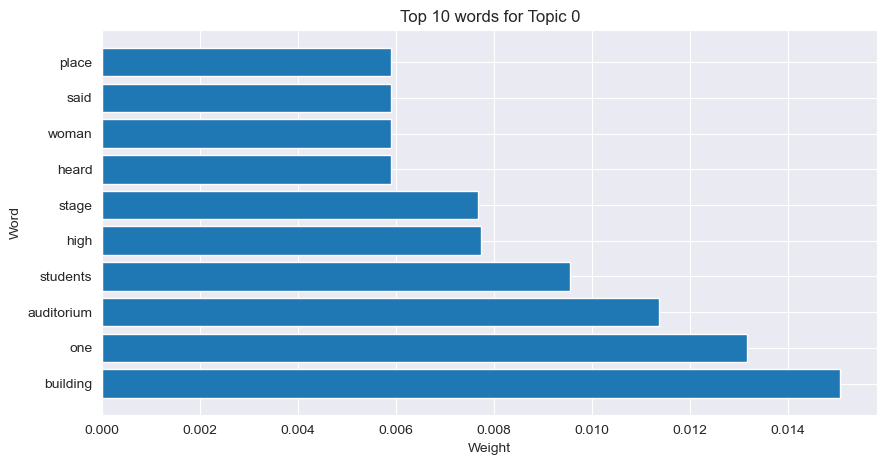

In [203]:
import matplotlib.pyplot as plt

def plot_top_words(lda_model, topic_id, num_words=10):
    terms = lda_model.get_topic_terms(topicid=topic_id, topn=num_words)
    term_names = [dictionary.get(term_id) for term_id, _ in terms]
    term_weights = [weight for _, weight in terms]
    
    plt.figure(figsize=(10, 5))
    plt.barh(term_names, term_weights)
    plt.xlabel('Weight')
    plt.ylabel('Word')
    plt.title(f'Top {num_words} words for Topic {topic_id}')
    plt.show()

plot_top_words(lda_model, topic_id=0, num_words=10)


In [204]:
# import necessary modules
import ipywidgets as widgets            # for the interactive widgets, like sliders
from IPython.display import display     # to render the interactive widgets

# plot the top words
# define function `plot_top_words`, which takes the parameters:
# - trained model `lda_model`
# - a topic to visualize (`topic_id`)
# - the number of top words to display (`num_words`)
def plot_top_words(lda_model, topic_id, num_words=10):
    # 1. use the `get_topic_terms` method from the LDA model to get the top `num_words` terms for the given `topic_id` and store them in `terms`
    terms = lda_model.get_topic_terms(topicid=topic_id, topn=num_words)
    # 2. extract the word corresponding to each term ID using the dictionary object. the list comprehension constructs a list of term names.                       
    term_names = [dictionary.get(term_id) for term_id, _ in terms]
    # 3. extract the weights of each term and store them in `term_weights`
    term_weights = [weight for _, weight in terms]
    
    # 4. create a horizontal bar chart using matplotlib, with y-axis for terms and x-axis for their weights
    plt.figure(figsize=(10,5))
    plt.barh(term_names, term_weights)
    plt.xlabel('Weight')
    plt.ylabel('Word')
    plt.title(f'Top {num_words} words for Topic {topic_id}')
    plt.show()

# create an integer slider for topics
topic_slider = widgets.IntSlider(
    value=0,                    # initial value of `0`
    min=0,                      # minimum value of `0`
    max=4,                      # max value of `4`
    step=1,                     # step size of `1`
    description='Topic ID:',    # label of `Topic ID:`
    disabled=False,             # `False` enables user interaction with slider
    continuous_update=False,    # `False` ensures the function is called only once you release the slider handle
    orientation='horizontal',   # orientation of slider is `horizontal`
    readout=True,               # `True` will display current value of slider next to it
    readout_format='d'          # displays readout in integer format
)

# create interactive plot
widgets.interactive(plot_top_words, lda_model=widgets.fixed(lda_model), topic_id=topic_slider, num_words=widgets.fixed(10))



/Users/mollyscally/anaconda3/lib/python3.11/site-packages/ipykernel/pylab/backend_inline.py:10: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  warnings.warn(


interactive(children=(IntSlider(value=0, continuous_update=False, description='Topic ID:', max=4), Output()), …

breakdown of LDA results  
- Topic 0, Educational Buildings: "building", "one", "auditorium", "students", "high"
- Topic 1, Older Structures: "chaplin", "building", 

In [311]:
los_angeles_df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,count
0,Los Angeles,United States,"Last year, during the filming of VH-1's ""Rando...",Ambassador Hotel,California,CA,-118.297101,34.059646,-118.243685,34.052234,1
1,Los Angeles,United States,"Formerly Pabst Blue Ribbon, this complex house...",Angel City Brewery,California,CA,-118.237693,34.046261,-118.243685,34.052234,1
2,Los Angeles,United States,"Late at night or in the morning, teachers and ...",Bancroft Middle school,California,CA,-118.337063,34.087827,-118.243685,34.052234,1
3,Los Angeles,United States,Suva Intermediate School - A Janitor who commi...,Bell Gardens,California,CA,-118.151459,33.965292,-118.243685,34.052234,1
4,Los Angeles,United States,"The spirit of a young girl by the name of ""Ara...",Belmont High School,California,CA,-118.262934,34.061457,-118.243685,34.052234,1
...,...,...,...,...,...,...,...,...,...,...,...
56,Los Angeles,United States,The vaudeville-era Palace at 6th and Broadway ...,Palace Theatre,California,CA,-118.252351,34.045726,-118.243685,34.052234,1
57,Los Angeles,United States,Dykstra Hall - Dykstra 10th floor showers turn...,University of California,California,CA,-118.445181,34.068921,-118.243685,34.052234,1
58,Los Angeles,United States,Venice high school - it has been said that aud...,Venice,California,CA,-118.469483,33.985047,-118.243685,34.052234,1
59,Los Angeles,United States,Westminster Ave. Apartment Bldg. - Charlie Cha...,Venice Beach,California,CA,-118.469483,33.985047,-118.243685,34.052234,1


**text summarization**
1. Los Angeles

In [310]:
from transformers import BartForConditionalGeneration, BartTokenizer

def summarize_text(text):
    # Load the pre-trained BART model and tokenizer
    model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

    # Tokenize the text and obtain model outputs
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode and return the summary
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Assuming we have a dataframe `df` with a column 'description' for the haunted places
los_angeles_df['summary'] = los_angeles_df['description'].apply(summarize_text)


KeyboardInterrupt: 

In [312]:
from gensim.summarization import summarize


def extractive_summary(text):
    try:
        # The ratio parameter determines the fraction of the number of sentences in the original text to be retained.
        # You can adjust the ratio parameter to get longer or shorter summaries.
        return summarize(text, ratio=0.4)  # Adjust ratio as needed
    except ValueError:
        # This exception is raised when the text is too short for Gensim to produce a summary
        return text

# Apply the extractive summarization function to the 'description' column
los_angeles_df['extractive_summary'] = los_angeles_df['description'].apply(extractive_summary)


ModuleNotFoundError: No module named 'gensim.summarization'

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

def extractive_summarize(text):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, 3)  # Summarize to 3 sentences (you can adjust this)
    return " ".join([str(sentence) for sentence in summary])

los_angeles_df['extractive_summary'] = los_angeles_df['description'].apply(extractive_summarize)


In [313]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

def extractive_summarize_t5(text):
    # Load T5 pre-trained model and tokenizer
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    tokenizer = T5Tokenizer.from_pretrained('t5-small')

    # Encode the text and obtain model outputs
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode and return the summary
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Apply the function to the 'description' column
los_angeles_df['extractive_summary_t5'] = los_angeles_df['description'].apply(extractive_summarize_t5)


ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.


In [314]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

nlp = spacy.load('en_core_web_sm')

def extractive_summarize_spacy(text, percent=0.3):
    doc = nlp(text)
    word_frequencies = {}
    for word in doc:
        if word.text.lower() not in STOP_WORDS:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    max_frequency = max(word_frequencies.values())

    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word] / max_frequency

    sentence_scores = {}
    for sent in doc.sents:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

    select_length = int(len(sentence_scores) * percent)
    summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
    return ' '.join([word.text for word in summary])

# Apply the function
los_angeles_df['extractive_summary_spacy'] = los_angeles_df['description'].apply(extractive_summarize_spacy)


In [315]:
los_angeles_df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,count,extractive_summary_spacy
0,Los Angeles,United States,"Last year, during the filming of VH-1's ""Rando...",Ambassador Hotel,California,CA,-118.297101,34.059646,-118.243685,34.052234,1,
1,Los Angeles,United States,"Formerly Pabst Blue Ribbon, this complex house...",Angel City Brewery,California,CA,-118.237693,34.046261,-118.243685,34.052234,1,The sound of trains and freeway traffic are au...
2,Los Angeles,United States,"Late at night or in the morning, teachers and ...",Bancroft Middle school,California,CA,-118.337063,34.087827,-118.243685,34.052234,1,
3,Los Angeles,United States,Suva Intermediate School - A Janitor who commi...,Bell Gardens,California,CA,-118.151459,33.965292,-118.243685,34.052234,1,
4,Los Angeles,United States,"The spirit of a young girl by the name of ""Ara...",Belmont High School,California,CA,-118.262934,34.061457,-118.243685,34.052234,1,
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Los Angeles,United States,The vaudeville-era Palace at 6th and Broadway ...,Palace Theatre,California,CA,-118.252351,34.045726,-118.243685,34.052234,1,The vaudeville-era Palace at 6th and Broadway ...
57,Los Angeles,United States,Dykstra Hall - Dykstra 10th floor showers turn...,University of California,California,CA,-118.445181,34.068921,-118.243685,34.052234,1,RAs have been sent to investigate and the prob...
58,Los Angeles,United States,Venice high school - it has been said that aud...,Venice,California,CA,-118.469483,33.985047,-118.243685,34.052234,1,
59,Los Angeles,United States,Westminster Ave. Apartment Bldg. - Charlie Cha...,Venice Beach,California,CA,-118.469483,33.985047,-118.243685,34.052234,1,"It is documented that Chaplin, while accompani..."


2. San Antonio

3. Pittsburgh

4. Orlando

Text analysis is a rich field with many techniques that can be used to extract meaning and insights. Given your dataset about haunted places, some of these might be particularly interesting:

### Sentiment Analysis
This technique analyzes the sentiment expressed in text, categorizing it as positive, negative, or neutral. For your dataset, it could highlight cities or places where descriptions are exceptionally positive or negative, which might signify more intense haunted experiences.

### Named Entity Recognition (NER)
NER identifies and classifies named entities in text, such as names of people, locations, organizations, etc. This can help identify specific entities that are frequently mentioned across descriptions.

### Topic Modeling
As mentioned earlier, topic modeling techniques like Latent Dirichlet Allocation (LDA) can identify latent topics in a large corpus of text. In your context, this could uncover the most common themes in descriptions of haunted places.

### Word Embeddings
Word embeddings like Word2Vec or GloVe can capture semantic meaning of words by representing them in a high-dimensional space. You can use these to find words that are semantically similar to words of interest (e.g., 'ghost', 'haunted').

### Text Clustering
Text clustering can group descriptions based on their content. This can be used to categorize types of haunted places or experiences without requiring labeled data.

### Co-occurrence Networks
You can analyze the co-occurrence of words within a specific window of words in the text to find associations between different terms. In your context, it could be interesting to see which words often appear together in the descriptions.

### N-Grams
In addition to looking at individual words, you can also consider sequences of N words (N-grams). For example, bigrams (2-grams) could include 'haunted house' or 'dark forest', and looking at their frequency can provide more context than individual words.

### Concordance Analysis
Concordance lines show every occurrence of a given word along with a few words on either side. This can provide context for how a word is being used, which can be particularly insightful for your dataset.

### Text Summarization
Extractive or abstractive summarization techniques can be used to summarize the descriptions, making it easier to quickly understand the main points of each.

These techniques can be combined in various ways to generate deeper insights into your dataset. Many of them are available as pre-built libraries or models, which makes it relatively easy to start using them.

2. San Antonio  

3. Pittsburgh 